In [2]:
import pandas as pd
import pyscreenshot as ImageGrab
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

from pynput.mouse import Button, Controller
import pyautogui
import time as tlib
from datetime import *
import numpy as np
import matplotlib.pyplot as plt

I want to automate some of the daily trading activities, so that I dont need to watch the stock going up and down.  

Trading 212 doesnt seem to provide an API and I dont want use a third party library, as it might be dangerous.   

My Idea is to control my mouse and let it click around.  

This is not the most elegant solution, but I think it is a good starting point.  
Most importantly, it is fun :D

# Making tools

## Screen shot testing

Let us dont worry about the scheme yet. First let us get the tools right. I think that these are the tools I need:
- Screen shot (<b>CHECK</b>)
- Mouse click (<b>CHECK</b>)
- read data (<b>CHECK</b>)
- type number (<b>CHECK</b>)

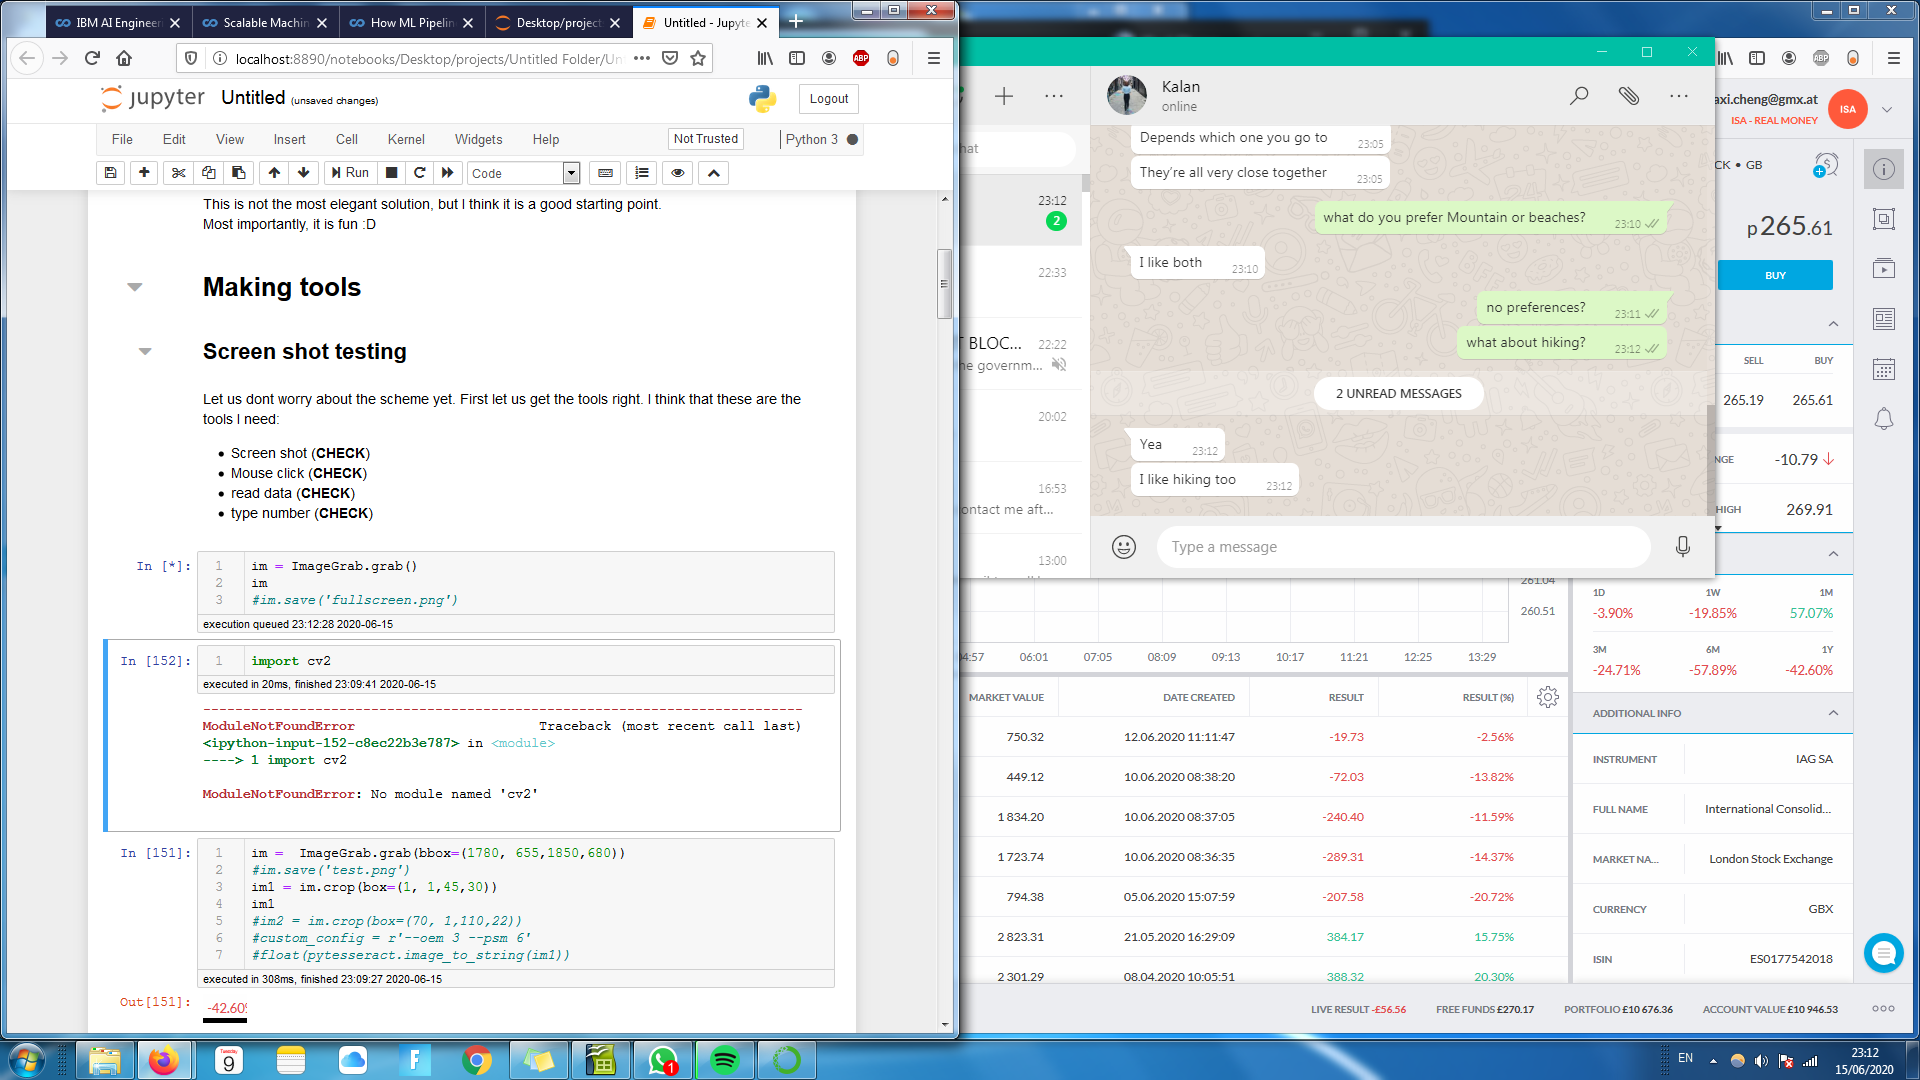

In [2]:
im = ImageGrab.grab()
im
#im.save('fullscreen.png')

In [4]:
import cv2

In [15]:
im =  ImageGrab.grab(bbox=(1780, 655,1850,680))
#im.save('test.png')
im1 = im.crop(box=(1, 1,45,30))

custom_config = r'--oem 1 --psm 6'
float(pytesseract.image_to_string(im1, config=custom_config))

-42.6

In [3]:
im =  ImageGrab.grab(bbox=(1000, 580,1140,620))
im
#custom_config = r'--oem 3 --psm 6'
test = pytesseract.image_to_string(im)
print(test)
im


KeyboardInterrupt



In [56]:
"Buy" in test

False

In [2303]:
sellbuyPrice=(1725, 380,1860,402)
sellsubPrice = (8, 1,45,22)
buysubPrice = (83, 1,115,22)

im =  ImageGrab.grab(bbox=buysubPrice)
im
#sellP0 = im.crop(box=sellsubPrice)

sellP = pytesseract.image_to_string(im.crop(box=buysubPrice))
im.crop(box=sellbuyPrice)

#    buyP0 = im.crop(box=buybox)
#    custom_config = r'--oem 3 --psm 6'
#    sellP = float(pytesseract.image_to_string(sellP0, config=custom_config))
    #custom_config = r'--oem 3 --psm 6'
    #buyP = float(pytesseract.image_to_string(buyP0, config=custom_config))

In [2305]:
get2(sellbuyPrice,sellsubPrice,buysubPrice)

[326.36, 26.68]

In [2301]:
def get2(pricebox, sellbox, buybox):
    im =  ImageGrab.grab(bbox=pricebox)
    sellP0 = im.crop(box=sellbox)
    buyP0 = im.crop(box=buybox)
    custom_config = r'--oem 3 --psm 6'
    sellP = float(pytesseract.image_to_string(sellP0, config=custom_config))
    #custom_config = r'--oem 3 --psm 6'
    buyP = float(pytesseract.image_to_string(buyP0, config=custom_config))
    return [sellP,buyP]

## Define position

In [2]:
#avgPrice = (1780, 200,1850, 250)
buyPrice = (1800, 380,1850,400)
sellPrice = (1730, 380,1772,400)

sellbuyPrice=(1725, 380,1860,402)
sellsubPrice = (8, 1,45,22)
buysubPrice = (83, 1,115,22)

exePrice = (1072, 660,1120,680)

buyBotton = (1780, 270)
sellBotton = (1660, 270)
keyboardBotton =(1100, 540)
reviewBotton = (950, 790)
sendBotton = (950, 750)

In [3]:
mouse = Controller()

In [1650]:
mouse.position = reviewBotton
#mouse.click(Button.left, 1)

In [1557]:
mouse.position = buyBotton
mouse.click(Button.left, 1)
time.sleep(0.2)

mouse.position = keyboardBotton
mouse.click(Button.left, 1)
time.sleep(0.2)

pyautogui.press("1")
time.sleep(0.2)

mouse.position = reviewBotton
mouse.click(Button.left, 1)

AttributeError: type object 'datetime.time' has no attribute 'sleep'

In [1563]:
click(buyBotton)

In [1656]:
click(buyBotton)
click(keyboardBotton)
click(keyboardBotton)
typing(1)
#click(reviewBotton)
#get(exePrice)
#click(sendBotton)

## Collecting data

In [4]:
testDF = pd.DataFrame({})

In [5]:
while datetime.now()<datetime(2020, 5, 23, 11, 25, 0,0):
    pricelist = get2(sellbuyPrice,sellsubPrice,buysubPrice)
    testDF=testDF.append({'Time': datetime.now(),
                          "sell": pricelist[0],
                          "buy": pricelist[1]
                          }, ignore_index=True)


In [529]:
#testDF.to_csv("stoxx50.csv")

In [117]:
testDF.iloc[-1].buy

54.19

In [114]:
(testDF["sell"])

0      54.18
1      54.18
2      54.18
3      54.18
4      54.18
       ...  
433    54.17
434    54.17
435    54.17
436    54.17
437    54.17
Name: sell, Length: 438, dtype: float64

In [73]:
testDF["Time"].diff().mean()

Timedelta('0 days 00:00:01.222214')

## Final useful modules

In [4]:
def click(botton):
    mouse.position = botton
    tlib.sleep(0.2)
    mouse.click(Button.left, 1)
    tlib.sleep(0.2)
    
def typing(nr):
    strNr = str(nr)
    for i in strNr:
        pyautogui.press(i)
        tlib.sleep(0.15)

def get(price):
    im =  ImageGrab.grab(bbox=price)
    custom_config = r'--oem 3 --psm 6'
    res = float(pytesseract.image_to_string(im, config=custom_config))
    print(res)
    return res

def get2(pricebox, sellbox, buybox):
    im =  ImageGrab.grab(bbox=pricebox)
    sellP = im.crop(box=sellbox)
    buyP = im.crop(box=buybox)
    custom_config = r'--oem 3 --psm 6'
    sellP = float(pytesseract.image_to_string(sellP, config=custom_config))
    custom_config = r'--oem 3 --psm 6'
    buyP = float(pytesseract.image_to_string(buyP, config=custom_config))
    return [sellP, buyP]

In [5]:
def do(action, shareNr):
    if action == "buy":
        click(buyBotton)
        click(keyboardBotton)
        typing(shareNr)
        click(reviewBotton)
        click(sendBotton)
        tlib.sleep(2)
        
    elif action == "sell":
        click(sellBotton)

        click(keyboardBotton)
        typing(shareNr)
        click(reviewBotton)
        click(sendBotton)
        tlib.sleep(2)
   # tlib.sleep(0.2)
   #try:
    #    boughtprice=get(exePrice)
    #except:
    #    print("invalid interpretation")
    #    pass
    #click(sendBotton)
    #tlib.sleep(2)
    #return boughtprice

In [1670]:
do("buy",1)

In [1664]:
a

# Algo 1

In [1638]:
def runSim(data):
    #meanlist = [data[i*392:(i+1)*392].mean() for i in range(int(len(data)/392))]
    #print(len(meanlist))
    buylist=[]
    buyindlist=[]
    selllist=[]
    sellindlist=[]
    for ind, val in enumerate(data):
        if (ind>10):
            prev = data[ind-1]
            minimum = data[ind-2]
            #pmin = data[ind-3]
            #ppmin = data[ind-4]
            #pppmin = data[ind-5]
            #ppppmin = data[ind-6]
            #print(meanlist[int(ind/391)])
        
            #if (val<=pLimt*meanlist[int(ind/391)-1])&(val>=prev)&(prev>=minimum)&(pmin>=minimum)&(ppmin>minimum)&(len(buylist)==len(selllist)):
            if len(buylist)==0:
                if (val >= prev)&(prev<minimum)&(len(buylist)==len(selllist)):
                    buylist.append(val)
                    buyindlist.append(ind)

            else:
                if len(selllist)>0:
                    if (val<selllist[-1])&(val >= prev)&(prev<minimum)&(len(buylist)==len(selllist)):
                        buylist.append(val)
                        buyindlist.append(ind)
                    elif (len(buylist)>len(selllist))&(val<prev)&(prev>=minimum)&(val>buylist[-1]):
                        selllist.append(val)
                        sellindlist.append(ind)
                elif (len(buylist)>len(selllist))&(val<prev)&(prev>=minimum)&(val>buylist[-1]):
                    selllist.append(val)
                    sellindlist.append(ind)
                else:
                    pass
     
    try:
        actualProfit = data.iloc[sellindlist[-1]]-data.iloc[buyindlist[0]]
        actprofitPct=actualProfit/data.iloc[buyindlist[0]]
    except:
        actualProfit = np.nan
        actprofitPct = np.nan
        
    try:
        profit = np.sum(np.array(selllist)-np.array(buylist[0:len(selllist)]))
        profitPct = profit/data.iloc[buyindlist[0]]
        nrTrans = len(np.array(selllist)-np.array(buylist[0:len(selllist)]))
    except:
        profit = np.nan
        profitPct = np.nan
        nrTrans = np.nan
        
    return np.array([nrTrans, profit,buyindlist,sellindlist, actualProfit, profitPct, actprofitPct])

In [1700]:
testDF = pd.DataFrame({}, columns=["Time","sell","buy"])
testDF.set_index(["Time"], inplace=True, drop=True)

In [1701]:
(testDF["buy"]-testDF["sell"]).plot()

TypeError: no numeric data to plot

In [1703]:
buylist=[]
buyindlist=[]
buytimelist=[]
selllist=[]
sellindlist=[]
selltimelist=[]

while datetime.now()<datetime(2020, 5, 26, 12, 30, 0,0):
    pricelist = get2(sellbuyPrice,sellsubPrice,buysubPrice)
    new_row = pd.DataFrame({"sell": pricelist[0],
                            "buy": pricelist[1]
                           }, index =[datetime.now()])
    testDF=pd.concat([testDF, new_row], ignore_index=False)
    
    currentP = testDF.iloc[-1]
    testAvgDF = testDF.resample('1T').mean()
    testAvgDF.reset_index(inplace=True)
    
    if len(testAvgDF)>4:
        val = testAvgDF.iloc[-1]
        prev = testAvgDF.iloc[-2]
        pprev = testAvgDF.iloc[-3]
        ppprev = testAvgDF.iloc[-4]

        if len(buylist)==0:
            if (currentP.buy<val.buy)&(val.buy > prev.buy)&(prev.buy<pprev.buy)&(pprev.buy<ppprev.buy)&(len(buylist)==len(selllist)):
                do("buy",20)
                buylist.append(currentP.buy)
                buyindlist.append(len(testDF)-1)
                buytimelist.append(datetime.now())
                print("Bought@"+str(currentP.buy))
        else:
            if len(selllist)>0:
                if (currentP.buy<val.buy)&(val.buy<selllist[-1])&(val.buy >= prev.buy)&(prev.buy<pprev.buy)&(len(buylist)==len(selllist)):
                    do("buy",20)
                    buylist.append(currentP.buy)
                    buyindlist.append(len(testDF)-1)
                    buytimelist.append(datetime.now())
                    print("Bought@"+str(currentP.buy))
                elif (currentP.sell>val.sell)&(len(buylist)>len(selllist))&(val.sell<prev.sell)&(prev.sell>=pprev.sell)&(val.sell>buylist[-1]+0.05):
                    do("sell",20)
                    selllist.append(currentP.sell)
                    sellindlist.append(len(testDF)-1)
                    timelist.append(datetime.now())
                    print("Sold@"+str(currentP.sell))
            elif (currentP.sell>val.sell)&(len(buylist)>len(selllist))&(val.sell<prev.sell)&(prev.sell>=pprev.sell)&(val.sell>buylist[-1]+0.05):
                do("sell",20)
                selllist.append(currentP.sell)
                sellindlist.append(len(testDF)-1)
                selltimelist.append(datetime.now())
                print("Sold@"+str(currentP.sell))
            else:
                pass 
                


ValueError: could not convert string to float: 'LTE'

In [1699]:
testDF

,sell,buy
2020-05-25 14:32:37.890978,57.55,57.56
2020-05-25 14:32:39.155050,57.54,57.56
2020-05-25 14:32:40.424123,57.54,57.56
2020-05-25 14:32:41.686195,57.54,57.56
2020-05-25 14:32:42.963268,57.54,57.56
...,...,...
2020-05-25 14:51:04.819291,57.75,57.77
2020-05-25 14:51:06.080363,57.74,57.77
2020-05-25 14:51:07.347435,57.74,57.77
2020-05-25 14:51:08.633509,57.74,57.77


In [1619]:
selllist

[56.32]

In [1620]:
selltimelist

[datetime.datetime(2020, 5, 25, 9, 30, 6, 69396)]

In [1518]:
tttt= testDF.resample('1T').mean()
tttt.reset_index(inplace=True)

In [1576]:
testDF.index(54.38)

TypeError: 'DatetimeIndex' object is not callable

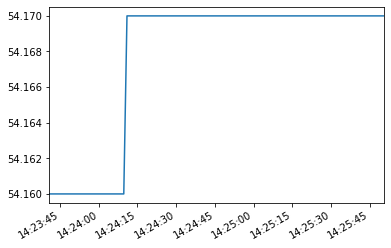

In [171]:
(testDF["sell"]).plot()

# Simulation with Random walk

## Setting up random walk

In [183]:
import matplotlib.pyplot as plt

In [622]:
dims = 1
step_n = 360
step_set = [-1, 0, 1]
origin = np.zeros((1,dims))# Simulate steps in 
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
simdata = path.T[0]

In [623]:
buylist=[]
buyindlist=[]
selllist=[]
sellindlist=[]
for ind, val in enumerate(simdata):
    if (ind>10):
        prev = simdata[ind-1]
        minimum = simdata[ind-2]
        pmin = simdata[ind-3]
        ppmin = simdata[ind-4]
        #ppmin = simdata[ind-5]
        
        if (val>=prev)&(prev>minimum)&(pmin>=minimum)&(ppmin>=pmin)&(ppmin>minimum)&(len(buylist)==len(selllist)):
            buylist.append(val)
            buyindlist.append(ind)
        elif len(buylist)>0:
            if (len(buylist)-1==len(selllist))&(val<prev)&(val>buylist[-1]):
                selllist.append(val)
                sellindlist.append(ind)

0.5


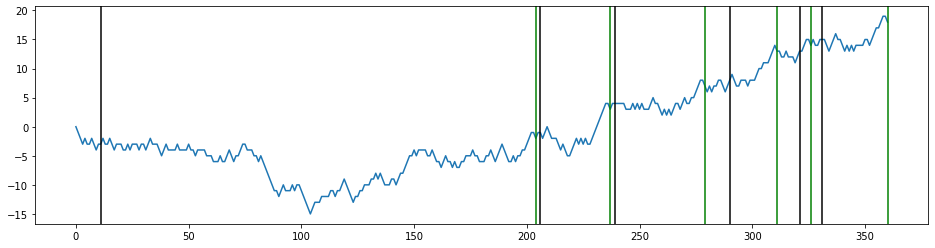

In [625]:
print(np.sum(np.array(selllist)-np.array(buylist[0:len(selllist)]))/(max(simdata)-min(simdata)))
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(simdata)
for ind, item in enumerate(buyindlist):
    ax.axvline(x=item, c="black")
    ax.axvline(x=sellindlist[ind], c="g")
    


## Building up a statistic

In [1729]:
def genData(nrdata):
    dims = 1
    step_n = nrdata
    step_set = [-1, 0, 1]
    origin = np.zeros((1,dims))+1000# Simulate steps in 
    step_shape = (step_n,dims)
    steps = np.random.choice(a=step_set, size=step_shape)
    path = np.concatenate([origin, steps]).cumsum(0)
    return path.T[0]

def runSim(data,pLimit):
    buylist=[]
    buyindlist=[]
    selllist=[]
    sellindlist=[]
    for ind, val in enumerate(data):
        if (ind>10):
            prev = data[ind-1]
            minimum = data[ind-2]
            pmin = data[ind-3]
            ppmin = data[ind-4]
            pppmin = data[ind-5]
            ppppmin = data[ind-6]
        
            if (val<pLimit)&(val>=prev)&(prev>minimum)&(pmin>=minimum)&(ppmin>=pmin)&(ppmin>minimum)&(pppmin>=ppmin)&(ppppmin>=pppmin)&(len(buylist)==len(selllist)):
                buylist.append(val)
                buyindlist.append(ind)
            elif len(buylist)>0:
                if (len(buylist)-1==len(selllist))&(val<prev)&(val>buylist[-1])&(val<=minimum)&(val>=pmin):
                    selllist.append(val)
                    sellindlist.append(ind)
                elif (len(buylist)-1==len(selllist))&(val<prev)&(val>=buylist[-1])&(val<=minimum)&(val>=pmin):
                    selllist.append(val)
                    sellindlist.append(ind)
                    
    ratio = np.sum(np.array(selllist)-np.array(buylist[0:len(selllist)]))/(max(simdata)-min(simdata))
    nrTrans = len(np.array(selllist)-np.array(buylist[0:len(selllist)]))
    if len(selllist)==len(buylist):
        rest = 0
    else:
        rest = 1
        
    if len(sellindlist)>0:
        lastind = sellindlist[-1]
    else:
        lastind = 0
    return [nrTrans, ratio,rest,lastind]

In [603]:
for item in np.arange(1,1.03,0.002):
    nrlist =[]
    ratiolist=[]
    imcomplete = []
    lastsell = []
    for i in range(1000):
        res=runSim(genData(420),350,1000*item)
        nrlist.append(res[0])
        ratiolist.append(res[1])
        imcomplete.append(res[2])
        lastsell.append(res[3])
    print(np.mean(nrlist), np.mean(ratiolist), np.sum(imcomplete))

1.774 0.2476 287
2.268 0.30040000000000006 318
2.441 0.33333333333333337 352
2.592 0.3425333333333333 377
2.888 0.387 420
3.148 0.41820000000000007 430
3.19 0.4238 449
3.409 0.465 433
3.287 0.4547333333333333 482
3.416 0.4689333333333333 483
3.491 0.4758 475
3.567 0.48760000000000003 508
3.439 0.4624666666666667 508
3.61 0.5034666666666667 512
3.665 0.5022 518
3.607 0.48573333333333335 543


In [ ]:
nrlist =[]
ratiolist=[]
imcomplete = []
lastsell = []
for i in range(1000):
    res=runSim(genData(420))
    nrlist.append(res[0])
    ratiolist.append(res[1])
    imcomplete.append(res[2])
    lastsell.append(res[3])
print(np.mean(nrlist), np.mean(ratiolist), np.sum(imcomplete))

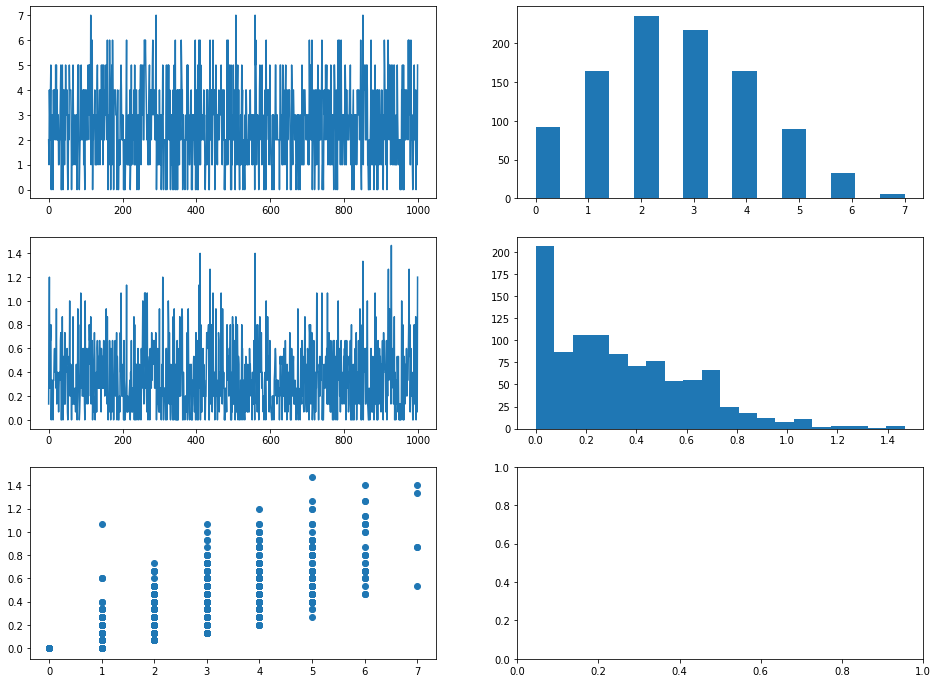

In [592]:
fig, ax = plt.subplots(ncols=2,nrows=3,figsize=(16,12))
ax[0,0].plot(nrlist)
ax[0,1].hist(nrlist,bins=15)
ax[1,0].plot(ratiolist)
ax[1,1].hist(ratiolist,bins=20)
ax[2,0].scatter(x=nrlist,y=ratiolist)

# Tesing on real data

## Prepare data

Let me prepare some real data.  
There are few cases I want to look at:
- daily 
- weekly
- monthly

Let us split the data to meet this requirement.

In [1141]:
test = pd.read_excel("data/CompanyNames.xlsx")
test=test[[" US " in item for item in test["Stock"]]]
test.reset_index(inplace = True, drop=True)

In [1142]:
test.head(10)

,Stock
0,AB US Equity
1,ABC US Equity
2,ACLS US Equity
3,ACM US Equity
4,ADI US Equity
5,ADSW US Equity
6,AIR US Equity
7,ALB US Equity
8,ALLE US Equity
9,ALSN US Equity


In [1143]:
unique_index = pd.Index(test.values.T[0])

unique_index.get_loc('AIR US Equity')

6

In [1222]:
fileString = []
for nr in range(70):
    if nr<10:
        fileString.append("0"+str(nr))
    else:
        fileString.append(str(nr))

In [1225]:
alldataUS =pd.concat([pd.read_excel("data/Data/us/usEquiData"+i+".xlsx") for i in fileString], ignore_index=True)

In [1260]:
alldataUS=alldataUS.fillna(method="ffill")
alldataUS=alldataUS.fillna(method="bfill")
#alldataUS.set_index("Dates",inplace=True)

In [1261]:
alldataUS = alldataUS.iloc[:,0::3]
alldataUS.head()

,Open0,Open1,Open2,Open3,Open4,Open5,Open6,Open7,Open8,Open9,...,Open446,Open447,Open448,Open449,Open450,Open451,Open452,Open453,Open454,Open455
Dates,,,,,,,,,,,,,,,,,,,,,
2019-04-29 14:29:00,29.21,74.03,21.30,33.1500,114.25,32.38,33.69,75.50,98.41,46.85,...,29.38,41.27,111.90,37.0600,159.58,123.16,85.35,102.500,27.190,104.150
2019-04-29 14:30:00,29.21,74.03,21.30,33.1500,114.25,32.38,33.69,75.50,98.41,46.85,...,29.38,41.27,111.90,37.0600,159.58,123.16,85.35,102.500,27.190,104.150
2019-04-29 14:31:00,29.17,74.03,21.30,33.1300,114.40,32.34,33.69,75.27,98.41,46.88,...,29.38,41.27,111.57,37.0800,159.58,123.16,85.35,102.500,27.200,104.150
2019-04-29 14:32:00,29.17,74.10,21.30,33.1825,114.40,32.32,33.70,75.26,98.41,47.01,...,29.24,41.27,111.22,37.0300,159.58,123.16,85.35,102.205,27.080,104.100
2019-04-29 14:33:00,29.15,74.00,21.34,33.1300,114.32,32.32,33.70,75.21,98.41,47.01,...,29.31,41.27,111.22,37.0511,159.58,123.32,85.35,102.260,27.065,103.845


Get the dates as a list:

In [1262]:
daylist = alldataUS.index.to_period('D').astype(str).unique()

In [1263]:
def dayData(nr):
    temp = alldataUS[daylist[nr]]
    temp.reset_index(inplace=True)
    return temp

In [1266]:
dayData(0).head()

,Dates,Open0,Open1,Open2,Open3,Open4,Open5,Open6,Open7,Open8,...,Open446,Open447,Open448,Open449,Open450,Open451,Open452,Open453,Open454,Open455
0,2019-04-29 14:29:00,29.21,74.03,21.30,33.1500,114.25,32.38,33.69,75.50,98.41,...,29.38,41.27,111.90,37.0600,159.58,123.16,85.35,102.500,27.190,104.150
1,2019-04-29 14:30:00,29.21,74.03,21.30,33.1500,114.25,32.38,33.69,75.50,98.41,...,29.38,41.27,111.90,37.0600,159.58,123.16,85.35,102.500,27.190,104.150
2,2019-04-29 14:31:00,29.17,74.03,21.30,33.1300,114.40,32.34,33.69,75.27,98.41,...,29.38,41.27,111.57,37.0800,159.58,123.16,85.35,102.500,27.200,104.150
3,2019-04-29 14:32:00,29.17,74.10,21.30,33.1825,114.40,32.32,33.70,75.26,98.41,...,29.24,41.27,111.22,37.0300,159.58,123.16,85.35,102.205,27.080,104.100
4,2019-04-29 14:33:00,29.15,74.00,21.34,33.1300,114.32,32.32,33.70,75.21,98.41,...,29.31,41.27,111.22,37.0511,159.58,123.32,85.35,102.260,27.065,103.845


now I need a data frame on a weekly basis.

In [1267]:
def weekData(nr):
    temp =pd.concat([alldataUS[daylist[i]] for i in range((nr)*5,nr*5+5,1)],ignore_index=False)
    temp.reset_index(inplace=True)
    return temp

In [1268]:
weekData(1).head()

,Dates,Open0,Open1,Open2,Open3,Open4,Open5,Open6,Open7,Open8,...,Open446,Open447,Open448,Open449,Open450,Open451,Open452,Open453,Open454,Open455
0,2019-05-06 14:29:00,29.3300,79.05,21.95,33.640,116.990,32.49,33.77,77.010,102.3199,...,29.915,41.71,119.25,39.290,160.60,122.84,86.56,112.33,26.78,102.79
1,2019-05-06 14:30:00,28.9300,78.13,21.39,32.930,114.070,32.43,33.14,75.660,102.3199,...,29.600,41.97,117.53,38.650,160.60,122.84,86.56,110.01,26.50,102.79
2,2019-05-06 14:31:00,28.9300,77.94,21.39,32.920,113.655,32.43,33.13,75.170,102.3199,...,29.380,41.97,117.79,38.540,158.09,122.84,86.56,110.30,26.47,101.56
3,2019-05-06 14:32:00,28.8086,78.53,21.33,33.029,113.700,32.41,33.15,75.155,102.3199,...,29.380,42.14,117.78,38.385,158.09,122.84,86.45,110.42,26.45,101.72
4,2019-05-06 14:33:00,28.8086,78.44,21.33,33.060,113.614,32.41,33.15,75.190,100.6700,...,29.460,42.14,117.64,38.495,158.09,122.84,86.45,110.37,26.49,101.66


let us plot them!

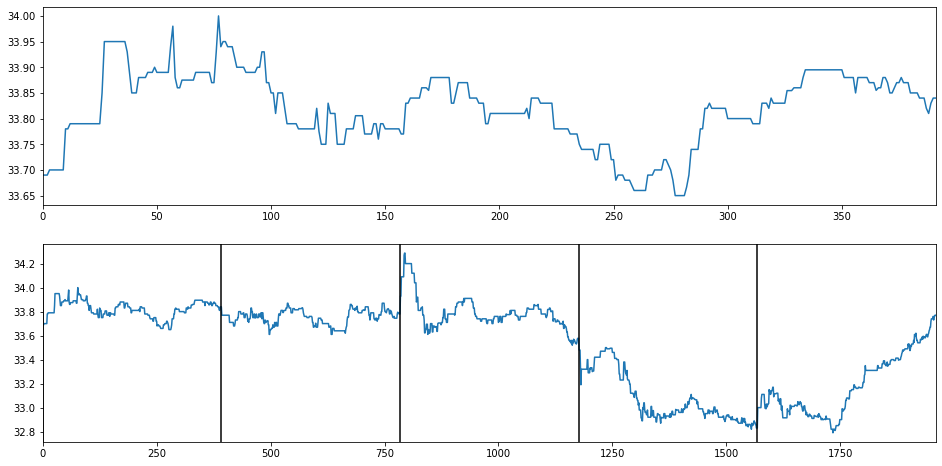

In [1270]:
fig, ax = plt.subplots(nrows=2,figsize=(16,8))
dayData(0)["Open6"].plot(ax=ax[0])
weekData(0)["Open6"].plot(ax=ax[1])
for i in range(5):
    ax[1].axvline(x=i*392,c="black")

## Modularise

i want to modularise everything. This mean spefify a set of rule this can be changed!

The system needs to be adaptable to the real trading. Let us break things down:  
1. Data in-flow
2. Decision making
3. Execution in case of TRUE
4. Log file

- Real trading:  
    Data collection and update database
- Simulation:  
    Data and data base ready
    
I will only change the input -  the rest remains.  
Say the input will be 2 numbers: buy and sell.

this updates a database which is used for decision making

In [1920]:
def updateDF(sellP, buyP, basisDF):
    new_row = pd.DataFrame({"sell" : sellP,
                           "buy" : buyP
                           }, index = [datetime.now()])
    basisDF = pd.concat([basisDF, new_row], ignore_index=False)
    return basisDF

This is decision making part.

In [1921]:
def decision(database,
             buyloglist, sellloglist,
             buyRule,
             sellRule, minProfit,
             buyExe, sellExe):
    currentP=database.iloc[-1]
    
    action = ""
    transaction = False
    if (len(buyloglist)==0):
        if buyRule:
            buyExe
            action ="Bought"
            transaction = True
    else:
        if  sellRule & \
            (len(buyloglist) > len(sellloglist)) & \
            (currentP.sell > buyloglist[-1]+minProfit):
            sellExe
            action ="Sold"
            transaction = True
        elif buyRule & (len(buyloglist) == len(sellloglist)):
            buyExe
            action ="Bought"
            transaction = True
    
    return [transaction, action, datetime.now(), currentP.buy]

This calculates the profit per share.

In [1953]:
def profit(buys, sells):
    return np.sum(np.array(sells)-np.array(buys)[0:len(sells)])

This is just for ploting.

In [1954]:
def plotRes(data,buys, sells, buyindex, sellindex):
    fig, ax = plt.subplots(figsize=(16,4))
    data.plot(ax=ax)
    for i in buytimelist:
        ax.axvline(x=i, c="red")
    for i in selltimelist:
        ax.axvline(x=i, c="g")
    ax.set_title(profit(buys,sells)/(data.max()-data.min()))

### On 1 share 1 day

creating empty dataframe

In [1956]:
dataDF = pd.DataFrame({},columns=["Time","sell","buy"])
dataDF.set_index(["Time"], inplace=True, drop=True)

define decision rules

In [1957]:
buylist = []
buytimelist=[]
selllist = []
selltimelist=[]
minProfit = 0.01

buyrule  =  lambda p1,p2,p3,p4,meanP:   (p1.buy > p2.buy) & \
                                        (p2.buy < p3.buy) & \
                                        (p3.buy < p4.buy) #& \
                                        #(p1.buy < meanP)
sellrule =  lambda p1,p2,p3:    (p1.sell >= p2.sell) & \
                                (p2.sell < p3.sell)


In [1958]:
for ind, newdata in testdata0.iterrows():
    dataDF = updateDF(newdata.sell, newdata.buy, dataDF)
    if len(dataDF)>5:
        p1 = dataDF.iloc[-1]
        p2 = dataDF.iloc[-2]
        p3 = dataDF.iloc[-3]
        p4 = dataDF.iloc[-4]
        
        analData = dataDF.iloc[-5:]
        meanP = np.mean(analData.buy)
        
        res = decision(
                        analData,
                        buylist, selllist,
                        buyrule(p1,p2,p3,p4,meanP),
                        sellrule(p1,p2,p3),
                        minProfit,
                        tlib.sleep(0.001),tlib.sleep(0.001)
                      )
        #print(res)
        if res[0]==True:
            if res[1] == "Bought":
                buylist.append(res[3])
                buytimelist.append(ind)
            elif res[1] == "Sold":
                selllist.append(res[3])
                selltimelist.append(ind)

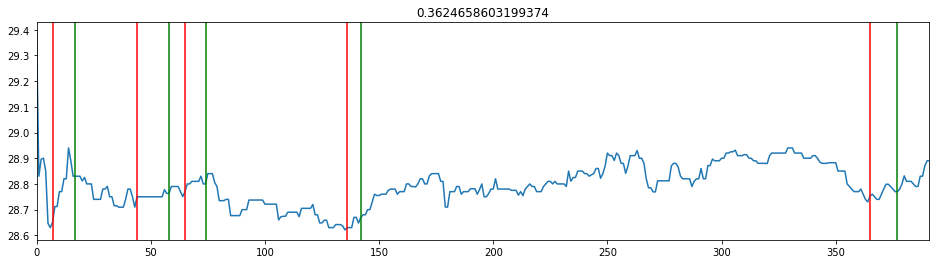

In [1955]:
plotRes(testdata0["buy"],
        buylist,
        selllist,buytimelist,selltimelist
       )

### Lets test on all days of this particular share

Let us now prep data

In [2168]:
def prepdata(sharNr,dayNr):
    testdata = dayData(dayNr)[["Dates","Open"+str(sharNr)]]
    testdata0=pd.DataFrame({"sell":testdata["Open"+str(sharNr)], "buy":testdata["Open"+str(sharNr)]})
    return testdata0

def prepWdata(sharNr,weekNr):
    testdata = weekData(weekNr)[["Dates","Open"+str(sharNr)]]
    testdata0=pd.DataFrame({"sell":testdata["Open"+str(sharNr)], "buy":testdata["Open"+str(sharNr)]})
    return testdata0

let us summarise the last section in one function

In [2132]:
def relProfit(sharNr,dayNr, minProfit, buyrule, sellrule):
    dataDF = pd.DataFrame({},columns=["Time","sell","buy"])
    dataDF.set_index(["Time"], inplace=True, drop=True)
    
    buylist = []
    buytimelist=[]
    selllist = []
    selltimelist=[]
    
    testdata0 = prepdata(sharNr,dayNr)
    for ind, newdata in testdata0.iterrows():
        dataDF = updateDF(newdata.sell, newdata.buy, dataDF)
        if len(dataDF)>5:
            p1 = dataDF.iloc[-1]
            p2 = dataDF.iloc[-2]
            p3 = dataDF.iloc[-3]
            p4 = dataDF.iloc[-4]
        
            analData = dataDF.iloc[-5:]
            meanP = np.mean(analData.buy)
            overallmeanP = np.mean(dataDF.buy)
        
            res = decision(
                            analData,
                            buylist, selllist,
                            buyrule(p1,p2,p3,p4,meanP, overallmeanP,ind),
                            sellrule(p1,p2,p3),
                            minProfit,
                            tlib.sleep(0.001),tlib.sleep(0.001)
                          )
        #print(res)
            if res[0]==True:
                if res[1] == "Bought":
                    buylist.append(res[3])
                    buytimelist.append(ind)
                elif res[1] == "Sold":
                    selllist.append(res[3])
                    selltimelist.append(ind)
    
    return [profit(buylist,selllist)/(testdata0.buy.max()-testdata0.buy.min()) , len(selllist), len(buylist)-len(selllist)] 

lets do this for a general duration profit

In [2172]:
393%392

1

In [2205]:
def relWProfit(sharNr,weekNr, minProfit, buyrule, sellrule):
    dataDF = pd.DataFrame({},columns=["Time","sell","buy"])
    dataDF.set_index(["Time"], inplace=True, drop=True)
    
    buylist = []
    buytimelist=[]
    selllist = []
    selltimelist=[]
    
    testdata0 = prepWdata(sharNr,weekNr)
    for ind, newdata in testdata0.iterrows():
        dataDF = updateDF(newdata.sell, newdata.buy, dataDF)
        if len(dataDF)>392:
            p1 = dataDF.iloc[-1]
            p2 = dataDF.iloc[-2]
            p3 = dataDF.iloc[-3]
            p4 = dataDF.iloc[-4]
        
            analData = dataDF.iloc[-5:]
            meanP = np.mean(analData.buy)
            i = ind%392
            overallmeanP = np.mean(dataDF.iloc[392*i:].buy)
            overallmeanP1 = np.mean(dataDF.iloc[392*(i-1):392*(i)].buy)
        
            res = decision(
                            analData,
                            buylist, selllist,
                            buyrule(p1,p2,p3,p4,meanP, overallmeanP,ind),
                            sellrule(p1,p2,p3,overallmeanP1),
                            minProfit,
                            tlib.sleep(0.001),tlib.sleep(0.001)
                          )
        #print(res)
            if res[0]==True:
                if res[1] == "Bought":
                    buylist.append(res[3])
                    buytimelist.append(ind)
                elif res[1] == "Sold":
                    selllist.append(res[3])
                    selltimelist.append(ind)
    
    return [profit(buylist,selllist)/(testdata0.buy.max()-testdata0.buy.min()) , len(selllist), len(buylist)-len(selllist)] 

This shows the result for share #0 on day 10 with a minimun trade profit of 1p.

In [2104]:
relProfit(0,10,0.05,buyrule0, sellrule)

[0.3847054233320269, 3, 0]

In [2195]:
relWProfit(0,1,0.05,buyrule0, sellrule)

[0.3597166615337249, 6, 1]

In [2106]:
relProfit(0,10,0.05,buyrule1, sellrule)

[0.5383720930232573, 3, 1]

Let try different rules:

In [2228]:
buyrule0  =  lambda p1,p2,p3,p4,meanP, overallmeanP, ind:   (p1.buy > p2.buy) & \
                                        (p2.buy < p3.buy) & \
                                        (p3.buy < p4.buy)
    
buyrule1  =  lambda p1,p2,p3,p4,meanP, overallmeanP, ind:   (p1.buy > p2.buy) & \
                                        (p2.buy < p3.buy) & \
                                        (p3.buy < p4.buy) & \
                                        (p1.buy < meanP)


buyrule2  =  lambda p1,p2,p3,p4,meanP, overallmeanP, ind:   (p1.buy > p2.buy) & \
                                        (p2.buy < p3.buy) & \
                                        (p3.buy < p4.buy) & \
                                        (p1.buy < meanP) & \
                                        (p1.buy < overallmeanP*1.01)# & \
                                        #(ind < 270)

buyrule3  =  lambda p1,p2,p3,p4,meanP, overallmeanP, ind:   (p1.buy > p2.buy) & \
                                        (p2.buy < p3.buy) & \
                                        (p3.buy < p4.buy) & \
                                        (p1.buy < meanP) & \
                                        (p1.buy < overallmeanP) & \
                                        (ind < 270)

sellrule =  lambda p1,p2,p3:    (p1.sell >= p2.sell) & \
                                (p2.sell < p3.sell)

buyruleD  =  lambda p1,p2,p3,p4,meanP, overallmeanP,overallmeanP1, ind:   (p1.buy < overallmeanP1*0.995)

sellruleD =  lambda p1,p2,p3,overallmeanP1:    (p1.sell >= overallmeanP1*1.005)


In [2229]:
res0=pd.DataFrame([relProfit(122,day,0.05,buyrule0, sellrule) for day in range(70)],columns=["RelProfit", "Trades", "Open"])
res1=pd.DataFrame([relProfit(122,day,0.05,buyrule1, sellrule) for day in range(70)],columns=["RelProfit", "Trades", "Open"])

C:\Users\X\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


In [2230]:
res2=pd.DataFrame([relProfit(122,day,0.05,buyrule2, sellrule) for day in range(70)],columns=["RelProfit", "Trades", "Open"])

C:\Users\X\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


In [2231]:
res3=pd.DataFrame([relProfit(122,day,0.05,buyrule3, sellrule) for day in range(70)],columns=["RelProfit", "Trades", "Open"])

C:\Users\X\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


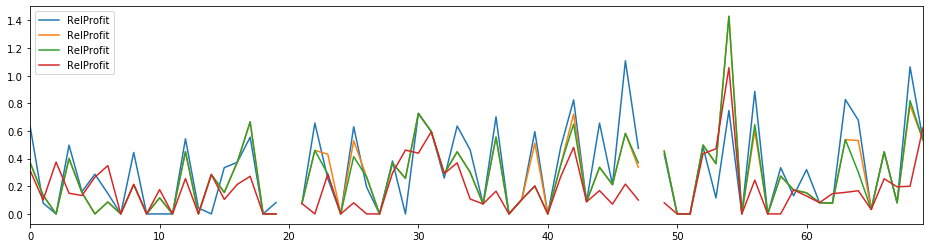

In [2232]:
fig, ax = plt.subplots(ncols=1, figsize=(16,4))
res0.plot(y="RelProfit",ax=ax)
res1.plot(y="RelProfit",ax=ax)
res2.plot(y="RelProfit",ax=ax)
res3.plot(y="RelProfit",ax=ax)

In [2233]:
print(len(res0["Open"][res0["Open"]==1]))
print(len(res1["Open"][res1["Open"]==1]))
print(len(res2["Open"][res2["Open"]==1]))
print(len(res3["Open"][res2["Open"]==1]))

66
63
60
60


In [2234]:
[res0["RelProfit"].mean(),
 res1["RelProfit"].mean(),
 res2["RelProfit"].mean(),
 res3["RelProfit"].mean()]

[0.31852016409119166,
 0.28090347761177553,
 0.269682908985037,
 0.18537789857003506]

In [2220]:
resWX=pd.DataFrame([relWProfit(12,day,0.05,buyrule1, sellrule) for day in range(10)],columns=["RelProfit", "Trades", "Open"])

In [2221]:
resWD=pd.DataFrame([relWProfit(12,day,0.05,buyruleD, sellruleD) for day in range(10)],columns=["RelProfit", "Trades", "Open"])

In [2222]:
resWD

,RelProfit,Trades,Open
0,0.000000,0,1
1,0.000000,0,1
2,0.000000,0,1
3,0.241002,1,1
4,0.235043,1,1
5,0.000000,0,0
6,0.016107,1,1
7,0.000000,0,0
8,0.000000,0,0
9,0.000000,0,1


In [2223]:
resWX

,RelProfit,Trades,Open
0,0.017730,1,1
1,0.070420,4,1
2,0.166048,5,1
3,0.179969,6,1
4,0.000000,0,1
5,0.598814,20,1
6,0.040268,1,1
7,0.000000,0,1
8,0.595965,22,1
9,0.158955,6,1


In [ ]:
prepWdata(sharNr,weekNr)

let us create separated dataframes for profit, nr of trades, open positions.

In [2064]:
profList =np.zeros((int(456/2), 70))
nrtradList =np.zeros((int(456/2), 70))
openList =np.zeros((int(456/2), 70))
for j in range(0,456,2):
    for i in range(70):
        temp=relProfit(j,i,0.05,buyrule, sellrule)
        profList[j,i]=temp[0]
        nrtradList[j,i]=temp[1]
        openList[j,i]=temp[2]

C:\Users\X\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars


IndexError: index 228 is out of bounds for axis 0 with size 228

In [2066]:
profitDF = pd.DataFrame(data=profList).T
nrtradDF = pd.DataFrame(data=nrtradList).T
openDF = pd.DataFrame(data=openList).T

let do some statistics:  
- percentage of days not making anything (-2 days of bank holidays)  
why?
- distribution of profit

In [2073]:
newprofitDF= profitDF.iloc[:,0::2]

(array([ 1.,  8., 17., 21., 21., 20.,  4.,  7.,  4.,  4.,  0.,  0.,  1.,
         0.,  1.,  1.,  2.,  1.,  0.,  1.]),
 array([0.        , 0.04705882, 0.09411765, 0.14117647, 0.18823529,
        0.23529412, 0.28235294, 0.32941176, 0.37647059, 0.42352941,
        0.47058824, 0.51764706, 0.56470588, 0.61176471, 0.65882353,
        0.70588235, 0.75294118, 0.8       , 0.84705882, 0.89411765,
        0.94117647]),
 <a list of 20 Patch objects>)

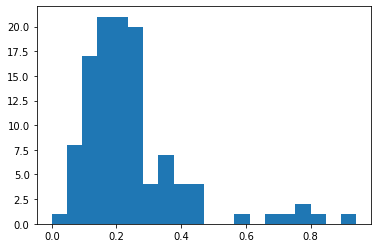

In [2086]:
plt.hist([(len(newprofitDF.iloc[:,nrShare][newprofitDF.iloc[:,nrShare]==0]))/68 for nrShare in range(len(newprofitDF.columns))],bins=20)

say around 20% of days, we dont do any trades.

(array([18., 14.,  7.,  6., 12.,  4.,  3.,  1.,  2.,  1.]),
 array([0.        , 0.1069697 , 0.21393939, 0.32090909, 0.42787879,
        0.53484848, 0.64181818, 0.74878788, 0.85575758, 0.96272727,
        1.06969697]),
 <a list of 10 Patch objects>)

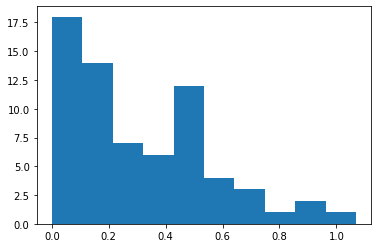

In [2091]:
plt.hist(newprofitDF.iloc[:,2],bins=10)

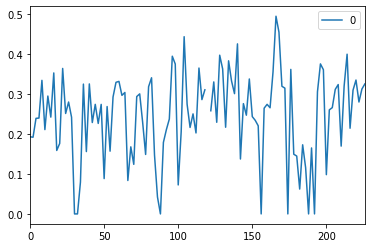

In [2097]:
newprofitDF.median().to_frame().plot()

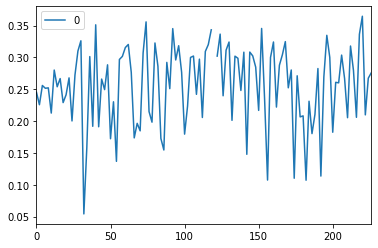

In [2098]:
newprofitDF.std().to_frame().plot()

Let us summarise all data we have.

In [2010]:
alldata = pd.concat([dayData(i) for i in range(70)], ignore_index=False)

In [2019]:
allMeandata = pd.concat([dayData(i).mean().to_frame().T for i in range(70)], ignore_index=False)

In [2026]:
allMaxMindata = pd.concat([(dayData(i).max().to_frame().T-dayData(i).min().to_frame().T)/(dayData(i).mean().to_frame().T) for i in range(70)], ignore_index=False)

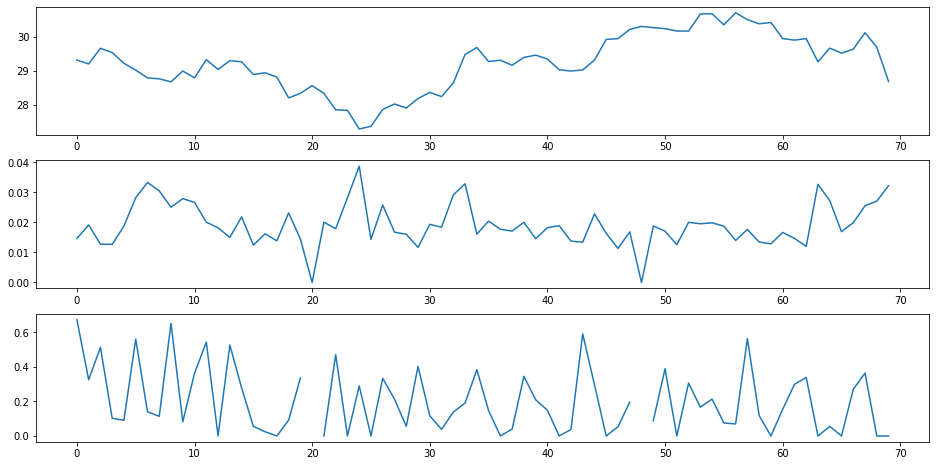

In [2034]:
fig, ax = plt.subplots(nrows=3,figsize=(16,8))
ax[0].plot(allMeandata["Open0"].values)
ax[1].plot(allMaxMindata["Open0"].values)
ax[2].plot(profList)

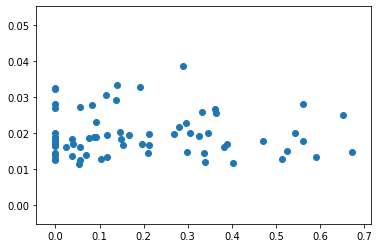

In [2036]:
plt.scatter(profList,allMaxMindata["Open0"].values)

In [1902]:
testdata0=pd.DataFrame({"sell":testdata["Open0"],
                        "buy":testdata["Open0"]}
                      )

In [1900]:
testdata = dayData(10)[["Dates","Open0"]]

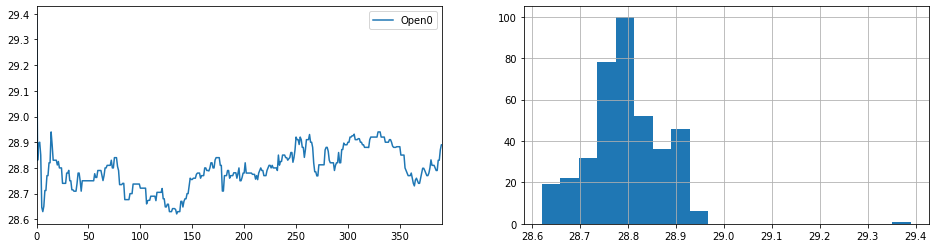

In [1901]:
fig, ax = plt.subplots(ncols=2, figsize=(16,4))
testdata.plot(y="Open0",ax=ax[0])
testdata["Open0"].hist(bins = 20, ax=ax[1])


## Low frequency 

The idea is to sell high buy low, based on historical volativity, and adjust the predicated mean of the next day based on previous daily increasement. 

### Testing

In [1318]:
def runDads(data,etaB,etaS):
    #meanlist = [data[i*391:(i+1)*391].mean() for i in range(int(len(data)/391))]
    #print(len(meanlist))
    buylist=[]
    buyindlist=[]
    selllist=[]
    sellindlist=[]
    for ind, val in enumerate(data):
        if (ind>=2*391):
            tempNr = int(ind/391)-1
            meanP1 = data[tempNr*391:(tempNr+1)*391].mean()
            meanP0 = data[(tempNr-1)*391:(tempNr)*391].mean()
            reldP = (meanP1 - meanP0)/meanP0
            #stdP = data[tempNr*391:(tempNr+1)*391].std()
                    
            #if (val<=pLimt*meanlist[int(ind/391)-1])&(val>=prev)&(prev>=minimum)&(pmin>=minimum)&(ppmin>minimum)&(len(buylist)==len(selllist)):
            if (val<(meanP1*(1+reldP)*(1-etaB)))&(len(buylist)==len(selllist)):
                buylist.append(val)
                buyindlist.append(ind)
            elif len(buylist)>0:
                if (len(buylist)>len(selllist))&(val>(meanP1*(1+reldP)*(1+etaS)))&(val>buylist[-1]):
                    selllist.append(val)
                    sellindlist.append(ind)

                    
   
    try:
        actualProfit = data.iloc[sellindlist[-1]]-data.iloc[buyindlist[0]]
        actprofitPct=actualProfit/data.iloc[buyindlist[0]]
    except:
        actualProfit = np.nan
        actprofitPct = np.nan
        
    try:
        profit = np.sum(np.array(selllist)-np.array(buylist[0:len(selllist)]))
        profitPct = profit/data.iloc[buyindlist[0]]
        nrTrans = len(np.array(selllist)-np.array(buylist[0:len(selllist)]))
    except:
        profit = np.nan
        profitPct = np.nan
        nrTrans = np.nan
        
    return np.array([nrTrans, profit,buyindlist,sellindlist, actualProfit, profitPct, actprofitPct])

In [1299]:
np.nan/10

nan

Trades: 1
profit: 0.20000000000000284 , 0.0061519532451554245%
Actual profit: 0.20000000000000284 , 0.0061519532451554245%


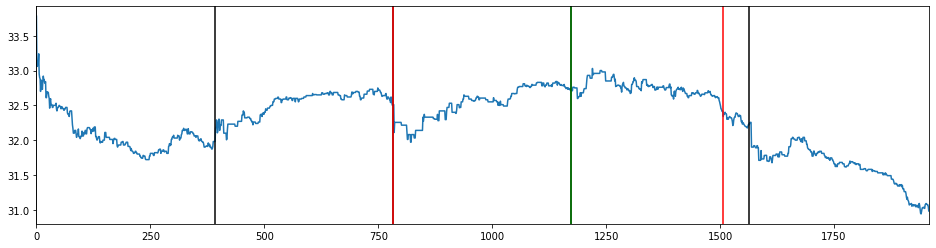

In [1403]:
weekDataNr =2
result =runDads(weekData(weekDataNr)["Open6"],0.005,0.005)
print("Trades: "+str(result[0]))
print("profit: "+str(result[1])+" , "+str(result[5])+"%")
print("Actual profit: "+str(result[4])+" , "+str(result[6])+"%")
fig, ax = plt.subplots(figsize=(16,4))
weekData(weekDataNr)["Open6"].plot(ax=ax)
for i in range(5):
    ax.axvline(x=i*391,c="black")
for buys in result[2]:
    ax.axvline(x=buys,c="r")
for sells in result[3]:
    ax.axvline(x=sells,c="g")

### Simulating monthly data for individual data

In [1277]:
dataUSmonth =[pd.concat([weekData(i) for i in range(u*5, u*5+5)],ignore_index=True) for u in range(2)]
#aarM1.reset_index(inplace=Falsee)

In [1283]:
def resultDad(data, etaB, etaS):
    result =runDads(data, etaB, etaS)
    print("Trades: "+str(result[0]))
    print("profit: "+str(result[1])+" , "+str(result[5])+"%")
    print("Actual profit: "+str(result[4])+" , "+str(result[6])+"%")
    
    fig, ax = plt.subplots(figsize=(16,4))
    data.plot(ax=ax)
    for i in range(30):
        ax.axvline(x=i*392,c="black")
    for buys in result[2]:
        ax.axvline(x=buys,c="r")
    for sells in result[3]:
        ax.axvline(x=sells,c="g")

Trades: 4
profit: 0.5499999999999972 , 0.01649670065986794%
Actual profit: -0.3100000000000023 , -0.009298140371925683%


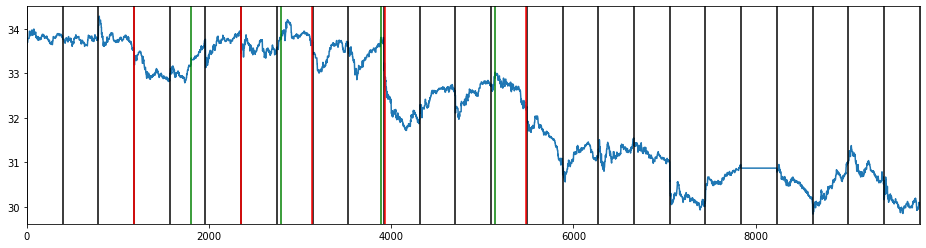

In [1319]:
resultDad(dataUSmonth[0]["Open6"],0.011,0.011)

Trades: 8
profit: 3.970000000000006 , 0.12159264931087309%
Actual profit: 4.3700000000000045 , 0.13384379785604916%


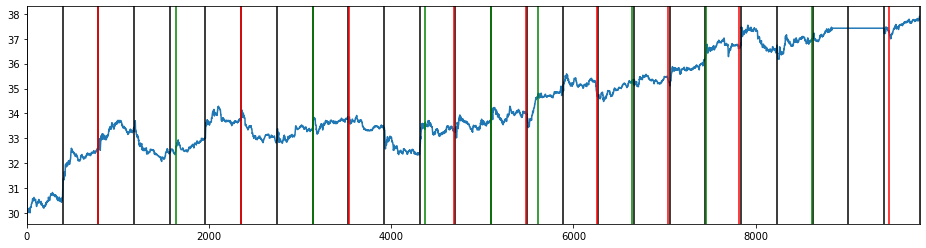

In [1302]:
resultDad(dataUSmonth[1]["Open6"],0.011,0.011)

### Simulating for all datasets

In [1325]:
dataUSM0Res = [runDads(dataUSmonth[0]["Open"+str(i)], 0.01, 0.01)[[0,5,6]] for i in range(456)]
dataUSM1Res = [runDads(dataUSmonth[1]["Open"+str(i)], 0.01, 0.01)[[0,5,6]] for i in range(456)]

In [1335]:
dfUSM0=pd.DataFrame(np.array(dataUSM0Res),columns=["Trades","Profit","NoAction"])
dfUSM1=pd.DataFrame(np.array(dataUSM1Res),columns=["Trades","Profit","NoAction"])

In [1338]:
dfUSM0=dfUSM0.dropna()
dfUSM0["Diff"]=dfUSM0["Profit"]-dfUSM0["NoAction"]

C:\Users\X\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1366]:
dfUSM1=dfUSM1.dropna()
dfUSM1["Diff"]=dfUSM1["Profit"]-dfUSM1["NoAction"]

C:\Users\X\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


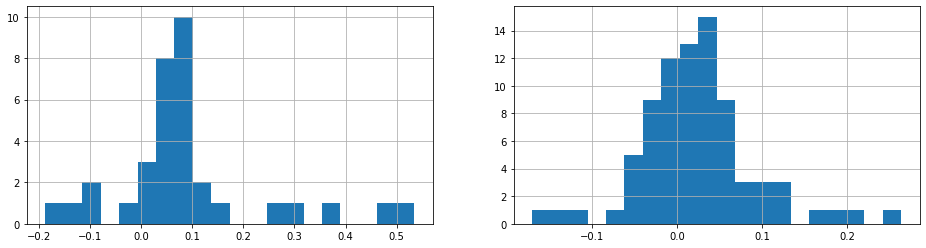

In [1373]:
tr=7
fig, ax = plt.subplots(ncols=2, figsize=(16,4))
dfUSM0[dfUSM0["Trades"]>tr]["Diff"].hist(bins=20,ax=ax[0])
dfUSM1[dfUSM1["Trades"]>tr]["Diff"].hist(bins=20,ax=ax[1])

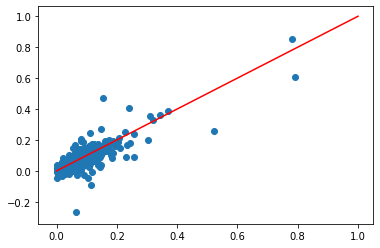

In [1397]:
tr=0
plt.plot([0,1],[0,1],c="r")
plt.scatter(x=dfUSM1[dfUSM1["Trades"]>tr]["Profit"],y=dfUSM1[dfUSM1["Trades"]>tr]["NoAction"])

## More frequent

In [1496]:
def runSim(data):
    #meanlist = [data[i*392:(i+1)*392].mean() for i in range(int(len(data)/392))]
    #print(len(meanlist))
    buylist=[]
    buyindlist=[]
    selllist=[]
    sellindlist=[]
    for ind, val in enumerate(data):
        if (ind>10):
            prev = data[ind-1]
            minimum = data[ind-2]
            pmin = data[ind-3]
            ppmin = data[ind-4]
            pppmin = data[ind-5]
            ppppmin = data[ind-6]
            #print(meanlist[int(ind/391)])
        
            #if (val<=pLimt*meanlist[int(ind/391)-1])&(val>=prev)&(prev>=minimum)&(pmin>=minimum)&(ppmin>minimum)&(len(buylist)==len(selllist)):
            if len(buylist)==0:
                if (val >= prev)&(prev<minimum)&(len(buylist)==len(selllist)):
                    buylist.append(val)
                    buyindlist.append(ind)

            else:
                if len(selllist)>0:
                    if (val<selllist[-1])&(val >= prev)&(prev<minimum)&(len(buylist)==len(selllist)):
                        buylist.append(val)
                        buyindlist.append(ind)
                    elif (len(buylist)>len(selllist))&(val<prev)&(prev>=minimum)&(val>buylist[-1]):
                        selllist.append(val)
                        sellindlist.append(ind)
                elif (len(buylist)>len(selllist))&(val<prev)&(prev>=minimum)&(val>buylist[-1]):
                    selllist.append(val)
                    sellindlist.append(ind)
                else:
                    pass
     
    try:
        actualProfit = data.iloc[sellindlist[-1]]-data.iloc[buyindlist[0]]
        actprofitPct=actualProfit/data.iloc[buyindlist[0]]
    except:
        actualProfit = np.nan
        actprofitPct = np.nan
        
    try:
        profit = np.sum(np.array(selllist)-np.array(buylist[0:len(selllist)]))
        profitPct = profit/data.iloc[buyindlist[0]]
        nrTrans = len(np.array(selllist)-np.array(buylist[0:len(selllist)]))
    except:
        profit = np.nan
        profitPct = np.nan
        nrTrans = np.nan
        
    return np.array([nrTrans, profit,buyindlist,sellindlist, actualProfit, profitPct, actprofitPct])

Trades: 65
profit: 9.133800000000129 , 0.1428048780487825%
Actual profit: 9.774999999999999 , 0.1528298936835522%


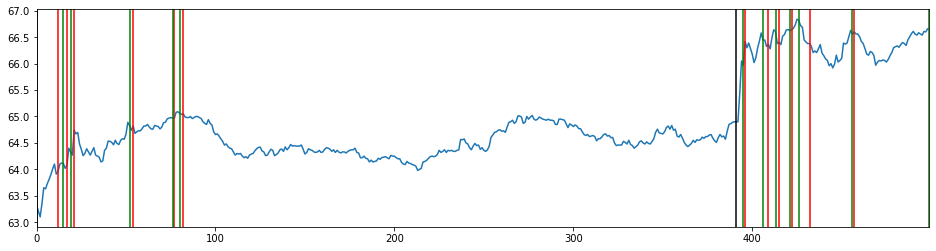

In [1497]:
dayDataNr =0
result =runSim(dataUSmonth[1]["Open7"])
print("Trades: "+str(result[0]))
print("profit: "+str(result[1])+" , "+str(result[5])+"%")
print("Actual profit: "+str(result[4])+" , "+str(result[6])+"%")
fig, ax = plt.subplots(figsize=(16,4))
dataUSmonth[1]["Open7"][0:500].plot(ax=ax)
for i in range(300):
    ax.axvline(x=i*391,c="black")
for buys in result[2]:
    ax.axvline(x=buys,c="r")
for sells in result[3]:
    ax.axvline(x=sells,c="g")

# Yahoo data

In [2235]:
import yfinance as yf
class stock():
    def __init__(self, yticker):
        self.yticker = yticker
    
    def load_rawdata(self):
        return yf.Ticker(self.yticker).history(period="max")
    
    def load_data(self):
        newdata = self.load_rawdata()
        newdata["Mean"] = (newdata["Open"]+newdata["High"]+newdata["Low"]+newdata["Close"])/4
        newdata["Volatility"] = (newdata["High"]-newdata["Low"])/newdata["Mean"]
        newdata["Momentum"] = (newdata["Close"]-newdata["Open"])/newdata["Mean"]
        return newdata

In [2236]:
aarData0 = stock("EZJ.L").load_data()

In [2278]:
aalData0 = stock("AAL").load_data()

In [2275]:
delData0 = stock("DAL").load_data()

In [2276]:
iagData0 = stock("IAG.L").load_data()

In [2277]:
wizzData0 = stock("WIZZ.L").load_data()

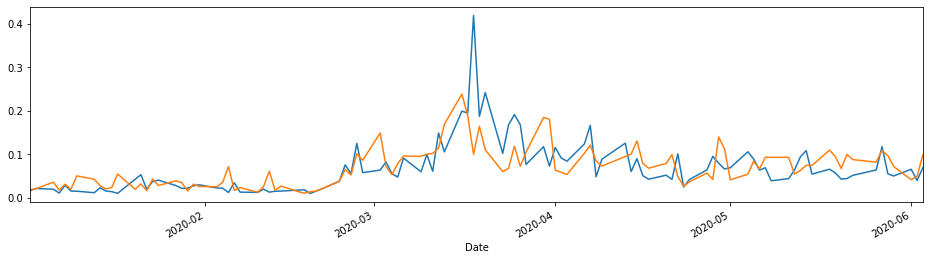

In [2282]:
fig, ax = plt.subplots(figsize = (16,4))
#aalData0["Volatility"]["2020":].plot(logy=True)
delData0["Volatility"]["2020":].plot()
iagData0["Volatility"]["2020":].plot()
#wizzData0["Volatility"]["2020":].plot(logy=True)

In [2239]:
aalData0["Volatility"]["2018":"2020-01"].median()

0.027172385805102922

In [1726]:
airbusData0 = stock("AIR.PA").load_data()

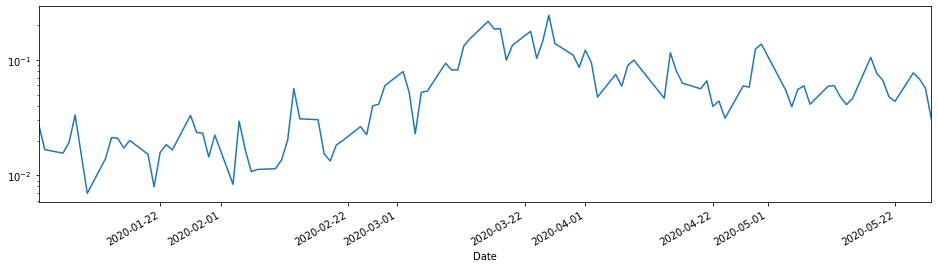

In [1727]:
fig, ax = plt.subplots(figsize = (16,4))
airbusData0["Volatility"]["2020":].plot(logy=True)

In [1728]:
np.sqrt((25.4/2)**2/2)

8.980256121069154

# Testing my own data

In [2246]:
iagdata=pd.read_csv("iag_mon.csv")

In [2256]:
iagdata

,Unnamed: 0,sell,buy
0,2020-06-01 07:53:10.673122,228.37,228.57
1,2020-06-01 07:53:12.340183,228.37,228.57
2,2020-06-01 07:53:13.973914,228.37,228.57
3,2020-06-01 07:53:15.624072,228.37,228.57
4,2020-06-01 07:53:17.325235,228.37,228.57
...,...,...,...
756,2020-06-01 08:14:53.385846,242.69,243.41
757,2020-06-01 08:14:55.070498,243.09,243.61
758,2020-06-01 08:14:56.739365,243.09,243.61
759,2020-06-01 08:14:58.487026,243.09,243.61


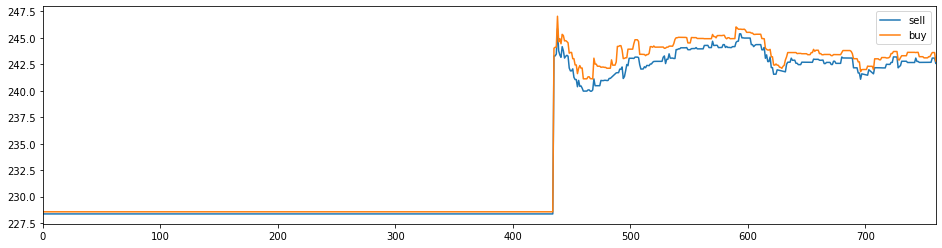

In [2257]:
fig, ax = plt.subplots(figsize=(16,4))
iagdata[iagdata["sell"]<300].plot(y="sell",ax=ax)
iagdata[iagdata["buy"]<300].plot(y="buy",ax=ax)

(array([ 18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 743.]),
 array([-2.3916990e+04, -2.1525043e+04, -1.9133096e+04, -1.6741149e+04,
        -1.4349202e+04, -1.1957255e+04, -9.5653080e+03, -7.1733610e+03,
        -4.7814140e+03, -2.3894670e+03,  2.4800000e+00]),
 <a list of 10 Patch objects>)

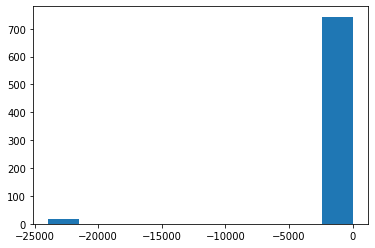

In [2259]:
plt.hist(iagdata.buy-iagdata.sell)

In [2268]:
test=(iagdata.iloc[450:].buy-iagdata.iloc[450:].sell)

(array([ 1.,  1., 11., 16., 11., 18., 23., 25., 35., 26., 32., 21., 19.,
         8.,  9.,  8.,  3.,  2.,  6.,  2.,  3.,  3.,  2.,  2.,  2.,  0.,
         2.,  0.,  0.,  2.]),
 array([0.22      , 0.29533333, 0.37066667, 0.446     , 0.52133333,
        0.59666667, 0.672     , 0.74733333, 0.82266667, 0.898     ,
        0.97333333, 1.04866667, 1.124     , 1.19933333, 1.27466667,
        1.35      , 1.42533333, 1.50066667, 1.576     , 1.65133333,
        1.72666667, 1.802     , 1.87733333, 1.95266667, 2.028     ,
        2.10333333, 2.17866667, 2.254     , 2.32933333, 2.40466667,
        2.48      ]),
 <a list of 30 Patch objects>)

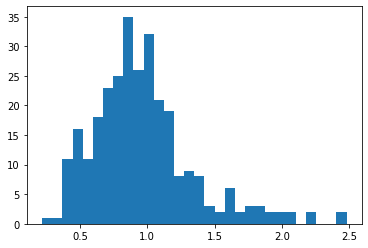

In [2270]:
plt.hist(test[test>0],bins=30)

In [2271]:
1/220.

0.004545454545454545

# My own data

In [6]:
iag = pd.read_csv("iag0306.csv")
iag.columns=["Time","sell","buy"]
iag["Time"]=pd.to_datetime(iag['Time']) 
iag.set_index("Time",inplace=True)
iag=iag[:"2020-06-03 15:00:00"]

In [7]:
airbus = pd.read_csv("airbus0306.csv")
airbus.columns=["Time","sell","buy"]
airbus["Time"]=pd.to_datetime(airbus['Time']) 
airbus.set_index("Time",inplace=True)
airbus=airbus[:"2020-06-03 15:00:00"]

## BMW

In [12]:
bmw0 = pd.read_csv("bmw1006.csv")
bmw1 = pd.read_csv("bmw1206.csv")
bmw0.columns=["Time","sell","buy"]
bmw1.columns=["Time","sell","buy"]
bmw0["Time"]=pd.to_datetime(bmw0['Time']) 
bmw1["Time"]=pd.to_datetime(bmw1['Time']) 

bmw0.set_index("Time",inplace=True)
bmw1.set_index("Time",inplace=True)


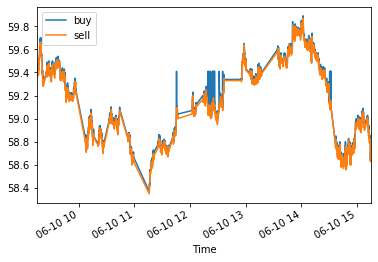

In [34]:
bmw0.plot(y=["buy","sell"])

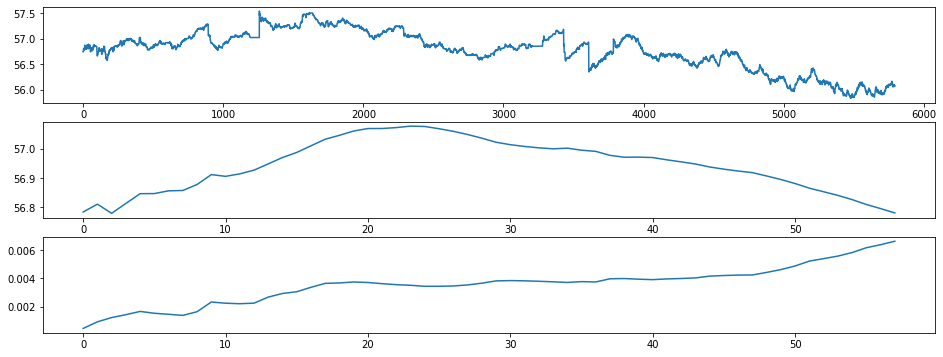

In [96]:
fig, ax = plt.subplots(nrows=3, figsize=(16,6))
ax[1].plot([bmw1[0:i].buy.mean() for i in range(10,len(bmw1),100)])
ax[0].plot(bmw1["buy"].values)
ax[2].plot([bmw1[0:i].buy.std()/(bmw1[0:i].buy.mean()) for i in range(10,len(bmw1),100)])

In [18]:
def updateDF(baseDF,indivIndex, newElement):
    new_row = pd.DataFrame({"sell": newElement[0],
                            "buy": newElement[1]
                            }, index =[indivIndex])
    baseDF=pd.concat([baseDF, new_row], ignore_index=False)
    return baseDF

def mkavgDF(baseDF):
    testAvgDF = baseDF.resample('T').mean()
    testAvgDF.reset_index(inplace=True)
    return testAvgDF

def getoverallMean(avgDF,suggMean):
    temp =avgDF[avgDF["buy"]<(suggMean*2)].buy.mean()
    return temp

def buyCond(dataList, meanoverall, maxbuyPratio):
    res =   (dataList[0].buy > dataList[1].buy)& (dataList[1].buy > dataList[2].buy)& (dataList[2].buy < dataList[3].buy)& (dataList[3].buy < dataList[4].buy)& (dataList[1].buy < meanoverall*maxbuyPratio)
    return res

def buyCond2(dataList, meanoverall, maxbuyPratio):
    res =   (dataList[1].buy > dataList[3].buy)& (dataList[1].buy > dataList[2].buy)& (dataList[2].buy < dataList[3].buy)& (dataList[3].buy < dataList[4].buy)& (dataList[1].buy < meanoverall*maxbuyPratio)
    return res

def sellCond(dataList,buylist, minProfit):
    res =   (dataList[5].sell > buylist[-1]+minProfit)&(dataList[1].sell > buylist[-1]+minProfit)& (dataList[1].sell < dataList[2].sell)& (dataList[2].sell >= dataList[3].sell)& (dataList[0].sell > buylist[-1]+minProfit)
    return res
#(dataList[5].sell > buylist[-1]+minProfit)&

In [120]:
testDF = pd.DataFrame({}, columns=["Time","sell","buy"])
testDF.set_index(["Time"], inplace=True, drop=True)
buylist=[]
buyindlist=[]
selllist=[]
sellindlist=[]
uplimit = 100
suggMean = 270
minProfit0 = 0.2
qty = 100
maxbuyPratio0=1.02

In [121]:
testDF

,sell,buy
Time,,


In [122]:
for ind, item in iag.iterrows():
    pricelist = [item.sell, item.buy]
    testDF = updateDF(testDF,ind,pricelist)
    currentP = testDF.iloc[-1]
    testAvgDF = mkavgDF(testDF)
    
    if len(testAvgDF)<60:
        maxbuyPratio = maxbuyPratio0
    elif len(testAvgDF)>=60:
        maxbuyPratio = 1+testAvgDF.buy.std()
        if currentP.buy > (testAvgDF.buy.mean()+testAvgDF.buy.std()):
            minProfit =minProfit0/2
        else:
            minProfit=minProfit0
    
    #maxbuyPratio = maxbuyPratio0
    
    if len(testAvgDF)>6:
        analList = [testAvgDF.iloc[-1],
                    testAvgDF.iloc[-2], 
                    testAvgDF.iloc[-3], 
                    testAvgDF.iloc[-4],
                    testAvgDF.iloc[-5],currentP
                   ]
        meanoverall = getoverallMean(testAvgDF, suggMean)
        
        if (len(buylist)==0):
            if buyCond(analList, meanoverall, maxbuyPratio)&buyCond2(analList, meanoverall, maxbuyPratio):
                buylist.append(currentP.buy)
                buyindlist.append(len(testDF)-1)
                    #####################################
        elif (len(buylist) > 0):
            if (len(buylist) == len(selllist)):
                        # buying: 2 down 1 up
                if buyCond(analList, meanoverall, maxbuyPratio)&buyCond2(analList, meanoverall, maxbuyPratio):
                    buylist.append(currentP.buy)
                    buyindlist.append(len(testDF)-1)

                        #####################################
                    # selling: up/equal 1 down 1     
            elif (len(buylist) > len(selllist)):
                if sellCond(analList,buylist, minProfit):
                    selllist.append(currentP.sell)
                    sellindlist.append(len(testDF)-1)


In [123]:
np.sum(np.array(selllist)-np.array(buylist)[:len(selllist)])

6.939999999999998

In [124]:
testAvgDF.set_index("index",inplace=True)

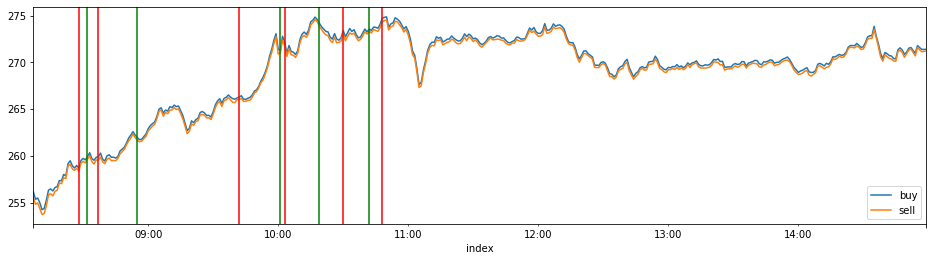

In [125]:
fig, ax=plt.subplots(figsize=(16,4))
testAvgDF.plot(y=["buy","sell"],ax=ax)
for item in buyindlist:
    ax.axvline(x=iag.index[item],c="red")
for item in sellindlist:
    ax.axvline(x=iag.index[item],c="g")

## Airbus

In [505]:
buyprice1=0
buyprice2=0
for ind, item in airbus.iterrows():
    pricelist = [item.sell, item.buy]
    testDF = updateDF(testDF,ind,pricelist)
    currentP = testDF.iloc[-1]
    testAvgDF = mkavgDF(testDF)

    if len(testAvgDF)>6:
        analList = [currentP,
                    testAvgDF.iloc[-2], 
                    testAvgDF.iloc[-3], 
                    testAvgDF.iloc[-4],
                    testAvgDF.iloc[-5]]
        meanoverall = getoverallMean(testAvgDF, suggMean)
        
        if buyCond(analList, meanoverall, maxbuyPratio):
            if (buyprice1==0)&(buyprice2==0):
                buyprice1=currentP.buy
                buylist.append(currentP.buy)
                buyindlist.append(len(testDF)-1)

            elif (buyprice1>0)&(buyprice2==0):
                buyprice2=currentP.buy
                buylist.append(currentP.buy)
                buyindlist.append(len(testDF)-1)
                
            elif (buyprice1==0)&(buyprice2>0):
                buyprice1=currentP.buy
                buylist.append(currentP.buy)
                buyindlist.append(len(testDF)-1)
        
        
        elif (buyprice1>0)& sellCond(analList,np.array([buyprice1]), minProfit):
            buyprice1=0
            selllist.append(currentP.sell)
            sellindlist.append(len(testDF)-1)
        elif (buyprice2>0)& sellCond(analList,np.array([buyprice2]), minProfit):
            buyprice2=0
            selllist.append(currentP.sell)
            sellindlist.append(len(testDF)-1)
        


In [20]:
np.sum(np.array(selllist)-np.array(buylist)[:len(selllist)])/2

0.13500000000000156

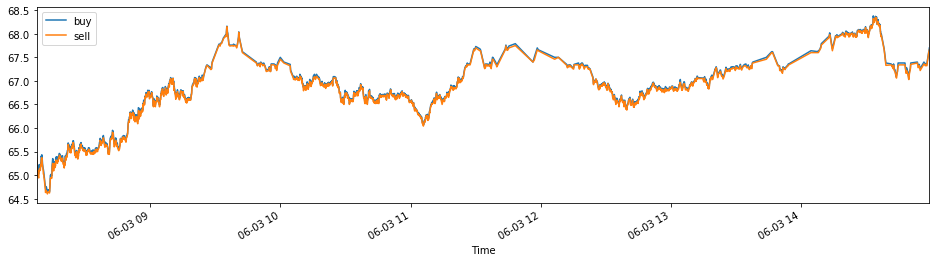

In [57]:
fig, ax=plt.subplots(figsize=(16,4))
airbus.plot(y=["buy","sell"],ax=ax)
for item in buyindlist:
    ax.axvline(x=airbus.index[item],c="red")
for item in sellindlist:
    ax.axvline(x=airbus.index[item],c="g")

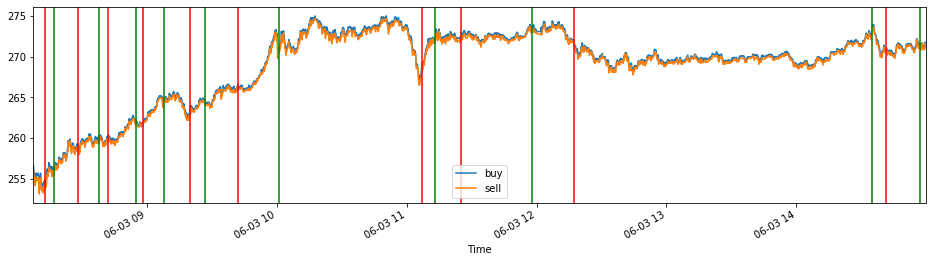

In [227]:
fig, ax=plt.subplots(figsize=(16,4))
iag.plot(y=["buy","sell"],ax=ax)
for item in buyindlist:
    ax.axvline(x=iag.index[item],c="red")
for item in sellindlist:
    ax.axvline(x=iag.index[item],c="g")

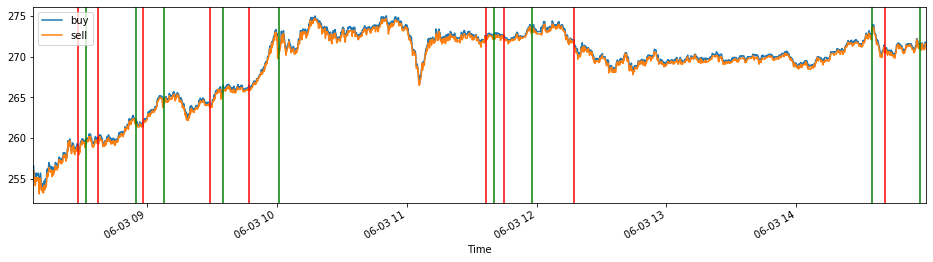

In [220]:
fig, ax=plt.subplots(figsize=(16,4))
iag.plot(y=["buy","sell"],ax=ax)
for item in buyindlist:
    ax.axvline(x=iag.index[item],c="red")
for item in sellindlist:
    ax.axvline(x=iag.index[item],c="g")

In [449]:
testAvgDF.set_index("index",inplace=True)

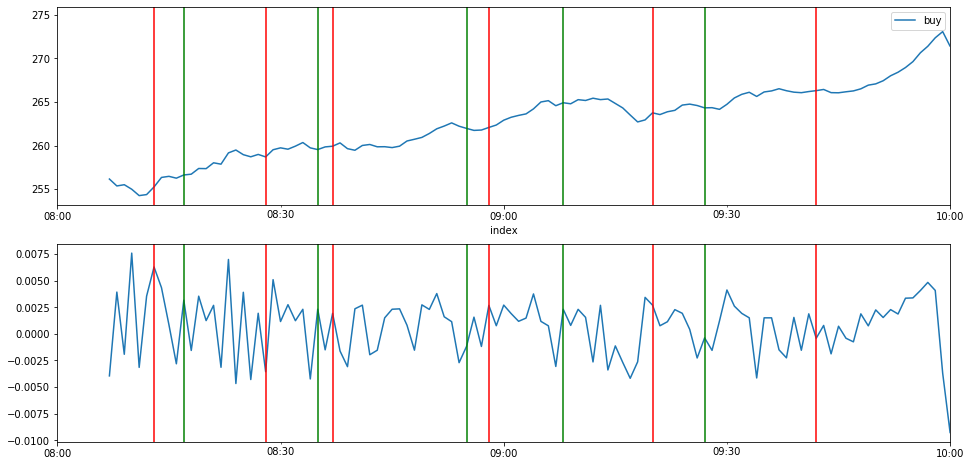

In [462]:
fig, ax=plt.subplots(nrows=2,figsize=(16,8))
testAvgDF.plot(y=["buy"],ax=ax[0])
(momDF["buy"]*((iag.resample("T").max()-iag.resample("T").min())/iag.resample("T").mean())[0:-1]["sell"]).plot(ax=ax[1])
for i in range(2):
    ax[i].set_xlim("2020-06-03 08:00:00","2020-06-03 10:00:00")
    for item in buyindlist:
        ax[i].axvline(x=iag.index[item],c="red")
    for item in sellindlist:
        ax[i].axvline(x=iag.index[item],c="g")

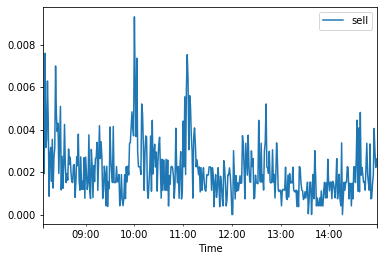

In [286]:
((iag.resample("T").max()-iag.resample("T").min())/iag.resample("T").mean()).plot(y=["sell"])

In [351]:
iag.resample("T").mean().index[0]

Timestamp('2020-06-03 08:07:00', freq='T')

In [356]:
test=iag.resample("T").mean()
test.index(iag.resample("T").mean().index[0])

TypeError: 'DatetimeIndex' object is not callable

In [365]:
test.loc[iag.resample("T").mean().index[10]]

sell    256.206364
buy     256.621818
Name: 2020-06-03 08:17:00, dtype: float64

In [336]:
iag.idxmin(axis = 0).buy>iag.idxmin(axis = 0).sell

True

In [367]:
testDF=iag.resample("T").mean()

In [391]:
def getMomentum(df, time1, time2):
    tempdf = df[time1:time2]
    if tempdf.idxmax(axis = 0).buy>tempdf.idxmin(axis = 0).buy:
        buyM=1
    else:
        buyM=-1
    
    if tempdf.idxmax(axis = 0).sell>tempdf.idxmin(axis = 0).sell:
        sellM=1
    else:
        sellM=-1
    return [buyM, sellM]

In [392]:
times = testDF.index.values

In [409]:
momDF=pd.DataFrame([getMomentum(iag,times[i],times[i+1]) for i in range(len(times)-1)],index=times[0:-1], columns=["buy","sell"])

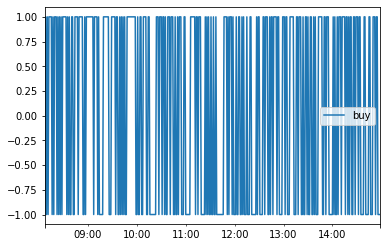

In [410]:
momDF.plot(y=["buy"])

In [411]:
(iag.resample("T").max()).iloc[0:-1]["buy"]*momDF["buy"]

Time
2020-06-03 08:07:00   -256.61
2020-06-03 08:08:00    255.72
2020-06-03 08:09:00   -255.72
2020-06-03 08:10:00    255.71
2020-06-03 08:11:00   -254.93
                        ...  
2020-06-03 14:54:00    271.20
2020-06-03 14:55:00    272.20
2020-06-03 14:56:00   -272.00
2020-06-03 14:57:00   -271.61
2020-06-03 14:58:00   -271.70
Freq: T, Name: buy, Length: 412, dtype: float64

In [406]:
momDF

,buy,sell
0,-1,-1
1,1,1
2,-1,-1
3,1,1
4,-1,-1
...,...,...
407,1,1
408,1,1
409,-1,-1
410,-1,1


# Testing Keras

In [13]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as md


In [14]:
master_url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

df_small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
df_small_noise_url = master_url_root + df_small_noise_url_suffix
df_small_noise = pd.read_csv(df_small_noise_url)

df_daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
df_daily_jumpsup_url = master_url_root + df_daily_jumpsup_url_suffix
df_daily_jumpsup = pd.read_csv(df_daily_jumpsup_url)


In [15]:
print(df_small_noise.head())

print(df_daily_jumpsup.head())


             timestamp      value
0  2014-04-01 00:00:00  18.324919
1  2014-04-01 00:05:00  21.970327
2  2014-04-01 00:10:00  18.624806
3  2014-04-01 00:15:00  21.953684
4  2014-04-01 00:20:00  21.909120
             timestamp      value
0  2014-04-01 00:00:00  19.761252
1  2014-04-01 00:05:00  20.500833
2  2014-04-01 00:10:00  19.961641
3  2014-04-01 00:15:00  21.490266
4  2014-04-01 00:20:00  20.187739


In [16]:
def plot_dates_values(data):
    dates = data["timestamp"].to_list()
    values = data["value"].to_list()
    dates = [datetime.strptime(x, "%Y-%m-%d %H:%M:%S") for x in dates]
    plt.subplots_adjust(bottom=0.2)
    plt.xticks(rotation=25)
    ax = plt.gca()
    xfmt = md.DateFormatter("%Y-%m-%d %H:%M:%S")
    ax.xaxis.set_major_formatter(xfmt)
    plt.plot(dates, values)
    plt.show()


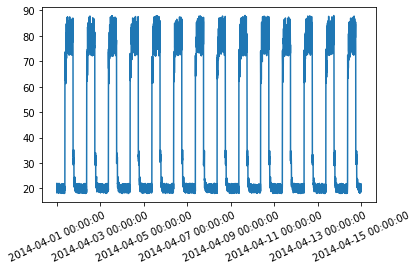

In [17]:
plot_dates_values(df_small_noise)


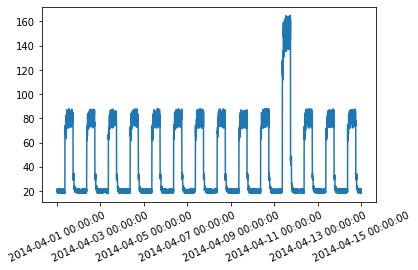

In [18]:
plot_dates_values(df_daily_jumpsup)


In [19]:
def get_value_from_df(df):
    return df.value.to_list()


def normalize(values):
    mean = np.mean(values)
    values -= mean
    std = np.std(values)
    values /= std
    return values, mean, std


# Get the `value` column from the training dataframe.
training_value = get_value_from_df(df_small_noise)

# Normalize `value` and save the mean and std we get,
# for normalizing test data.
training_value, training_mean, training_std = normalize(training_value)
len(training_value)


4032

In [20]:
TIME_STEPS = 288


def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps):
        output.append(values[i : (i + time_steps)])
    # Convert 2D sequences into 3D as we will be feeding this into
    # a convolutional layer.
    return np.expand_dims(output, axis=2)


x_train = create_sequences(training_value)
print("Training input shape: ", x_train.shape)


Training input shape:  (3744, 288, 1)


In [22]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()


AttributeError: module 'tensorflow.keras.layers' has no attribute 'Conv1DTranspose'